# Read file as lines

In [3]:
TEST = False
TEST_SOLUTION = 1930

INPUT_FN = "input_test.txt"

if not TEST:
    INPUT_FN = "input.txt" # 1477762

with open(INPUT_FN) as f:
    lines = [l.rstrip() for l in f]

if lines[-1]=='':
    lines=lines[:,-1]

In [4]:
#debug
# lines=[
#     'AAA',
#     'ABA',
#     'AAA'
# ]

# 80 OK
# input = """AAAA
# BBCD
# BBCC
# EEEC
# """

# # 436 # OK
# input = """OOOOO
# OXOXO
# OOOOO
# OXOXO
# OOOOO
#"""

# #236 #OK
# input ="""EEEEE
# EXXXX
# EEEEE
# EXXXX
# EEEEE
# """

# # 368 error is giving me 312 OK now
# input = """AAAAAA
# AAABBA
# AAABBA
# ABBAAA
# ABBAAA
# AAAAAA
# """

# input = """AAAA
# AABA
# ABAA
# AAAA
# """



# lines = [l.rstrip() for l in input.splitlines()]
# if lines[-1]=='':
#     lines=lines[:,-1]

In [5]:
lines

['MMMMMMMMMMMMWWWWWWWWAAAAAAAAAAAAAAAASSSSSSHHHIIHHHHHHHGGGGGGGGGXXXXXXXXEEEEEEENPMMMMMMMMMMPPPPPPPPPPPPPPPAAAHHPHHHHHHHHHHHHTTTTTTTTBBBBWWRRR',
 'MMMMMMMMMMWWWWWWWWWAAAAAAAAAAAAAAAAASSSSSSHHHHHHHHHHGHGGGGGGGGGXXXXXXEEEEEEEENNNMMMMMMMMMMPPPPPPPPPPPPPPPAAAHHHHHHHHHHHHHHHDTTTTQTBBBBWWWWRR',
 'MMMMMMMMMMMWWWWWWWWAAAAAAAAAAAAAAAAAASSSHHHHHHHHHHHHGGGGGGGGGGGXXXXXEEEEEENNNNNMMMMMMMMMMFPPPPPPPPPPPPPPPAAAHHHHHHHHHHHHHHHHTTTLTBBBBWWWWWWW',
 'MMMMMMMMMMMWVWWWWAAAAAAAAAAAAAAAAAAASSSSHHHHHHHHHHTTGGGGGGGGGGXXXXXXEEEEEEENNNNNMMMMMMMMMPPPPPPPPPPPPPPPPPAAHHHHHHHHHHHHHHHHTTTTTBBBBBBWWWWW',
 'MMMMMMMMMMWWWWWWWWAAAAAAAAAAAAAAAAAAAASSHHHHHHHHHHTHGGGGGGGGGGXXXXEEEEEEEEENNNNNMMMMMMMMMPPPPPPPPPPPPPPPPPRRHHHHHHHHHHHHHHHHTTTTBBBBBWWWWWWW',
 'MMMMMMMMMWWWWWWWWWAAAAAAAAAAAAAAAAAAAAUSHHHHHHHHHHHHHGGGGGGGGGGXXXXEESEEEENNNNNMMMMMMMMPPPPPPPPPPPPPPPPPPPRRRHDDHHHHHHHHHHHHTTTTTTBBWWWWWWWW',
 'MMMMMMMMMXWWWWWWWAAAAAAAAAAAAAAAAAAAAESSJHHHHHHHHHHHHGGGGGGGGGGGXXEEESEEEEEENNMMMMMMMMMPPPPPPPPPPPPPPPPGGPRRRRRRRHHHHHHHHHHRRRRT

Implementation

Have a counter object (collections Counter)
I will go over cell by cell, add one to area (counter). Perimeter is calculated by checking neighbours

In [6]:
nrows = len(lines)
ncols = len(lines[0])

In [7]:
def get_char_at(irow, icol):
    global lines
    return lines[irow][icol]

Count area and borders

In [8]:
from collections import Counter

counter_area = Counter()
counter_perimeter = Counter()

for irow in range(nrows):
    for icol in range(ncols):
        c = get_char_at(irow,icol)
        counter_area[c]+=1

        # perimeter
        if irow>0:
            if get_char_at(irow-1,icol)!=c:
                counter_perimeter[c]+=1
        else:
            counter_perimeter[c]+=1

        if irow<nrows-1:
            if get_char_at(irow+1,icol)!=c:
                counter_perimeter[c]+=1
        else:
            counter_perimeter[c]+=1

        if icol>0:
            if get_char_at(irow, icol-1)!=c:
                counter_perimeter[c]+=1
        else:
            counter_perimeter[c]+=1

        if icol<ncols-1:
            if get_char_at(irow, icol+1)!=c:
                counter_perimeter[c]+=1
        else:
            counter_perimeter[c]+=1

In [9]:
counter_area

Counter({'R': 1461,
         'H': 1225,
         'W': 1161,
         'Q': 1057,
         'M': 1012,
         'S': 898,
         'X': 870,
         'E': 857,
         'Z': 828,
         'V': 812,
         'K': 793,
         'L': 751,
         'O': 750,
         'T': 748,
         'B': 715,
         'G': 698,
         'U': 648,
         'F': 613,
         'C': 575,
         'P': 545,
         'N': 517,
         'Y': 484,
         'D': 438,
         'A': 385,
         'J': 381,
         'I': 378})

In [10]:
counter_perimeter

Counter({'R': 1056,
         'H': 964,
         'Q': 842,
         'W': 830,
         'M': 826,
         'X': 788,
         'S': 730,
         'Z': 718,
         'E': 714,
         'V': 694,
         'B': 690,
         'T': 686,
         'O': 680,
         'K': 656,
         'L': 622,
         'C': 598,
         'U': 568,
         'G': 540,
         'Y': 532,
         'N': 500,
         'F': 482,
         'P': 456,
         'D': 422,
         'I': 402,
         'J': 350,
         'A': 310})

This is not ok. I need to calculate area x perimeter *per patch*, so simply counting totals will not lead to result.

So need to seperate areas. Define area as a list of coordinates of points that belong to that area? Or just color them differently

Algorithm can iterate along all points. Keep track of points that have been assigned an area with a boolean.

For each new point/area, expand until can't no more. Store it as a new area.

Or can use connected components and regioprops from skimage

In [11]:
from skimage.measure import label, regionprops
import numpy as np

# convert chars to numpy
farm_np = np.zeros((nrows,ncols), dtype=np.uint32)

for irow in range(nrows):
    for icol in range(ncols):
        farm_np[irow,icol] = ord( get_char_at(irow,icol) )

In [12]:
farm_np

array([[77, 77, 77, ..., 82, 82, 82],
       [77, 77, 77, ..., 87, 82, 82],
       [77, 77, 77, ..., 87, 87, 87],
       ...,
       [81, 81, 81, ..., 79, 85, 85],
       [81, 81, 81, ..., 79, 85, 85],
       [81, 81, 81, ..., 79, 85, 85]], shape=(140, 140), dtype=uint32)

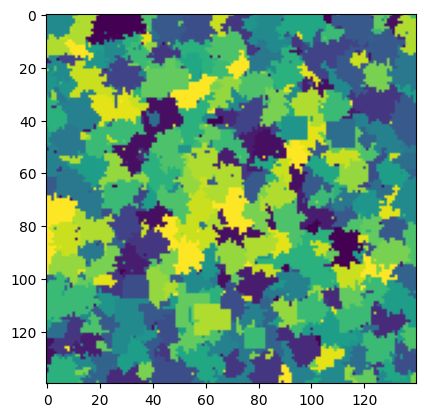

In [13]:
import matplotlib.pyplot as plt
plt.imshow(farm_np)

In [14]:
from skimage.measure import perimeter
def manhattan_perimeter(region_mask):
     return perimeter(region_mask, neighborhood=4)

In [15]:
rp_res = regionprops(farm_np, extra_properties=[manhattan_perimeter])

In [16]:
rp_res

In [17]:
print(rp_res[0].area)
print(rp_res[0].centroid)
print(rp_res[0].perimeter)
print(rp_res[0].manhattan_perimeter)


385.0
(np.float64(43.176623376623375), np.float64(65.31948051948052))
189.4386001800126
189.4386001800126


Area is ok, but perimeter is not. It does not work

Try manually coding

1. Go pixel by pixel that is not in mask.
2. New farm region. Enter a BFS algorithm to find all square regions that belong to it.
3. Once completed, get the farm area and perimeter
4. As we check, don't forget to keep the mask updated 

In [18]:
from collections import deque

mask = np.zeros_like(farm_np,dtype=bool)

regions=[]

while True:
    # get elements not checked
    to_check = np.where(mask==False)

    #print(f"{to_check=}")

    if len(to_check)>0:
        if to_check[0].size>0:
            # new region
            region_coords = []
            # get the first element, new region
            coord_y, coord_x = int(to_check[0][0]), int(to_check[1][0])
            print(f"new region {coord_y,coord_x}")
            region_char = farm_np[coord_y, coord_x]
            region_area=0
            region_perimeter=0

            # start a BFS from here
            bfs_to_visit = deque([(coord_y, coord_x)])
            while bfs_to_visit:
                y,x = bfs_to_visit.popleft()
                if not mask[y, x]: #check if it has been visited
                    mask[y,x] = True
                    region_coords.append( (y,x) )
                    region_area+=1

                    # Check neighbours
                    check_neighbs = []

                    if y > 0:
                        check_neighbs.append ((y-1, x) )
                    else:
                        region_perimeter+=1
                    if y < nrows-1:
                        check_neighbs.append( (y+1,x) )
                    else:
                        region_perimeter+=1
                    if x > 0:
                        check_neighbs.append( (y, x-1) )
                    else:
                        region_perimeter+=1
                    if x < ncols-1:
                        check_neighbs.append( (y, x+1 ))
                    else:
                        region_perimeter+=1

                    for yn,xn in check_neighbs:
                        if farm_np[yn,xn]==region_char:
                            bfs_to_visit.append( (yn,xn) )
                        else:
                            region_perimeter +=1
                            pass

            #store new region
            regions.append( {
                "region_char": chr(region_char),
                "region_area": region_area,
                "region_perimeter": region_perimeter,
                "region_coords": region_coords
                })
        else:
            break


new region (0, 0)
new region (0, 12)
new region (0, 20)
new region (0, 36)
new region (0, 42)
new region (0, 45)
new region (0, 54)
new region (0, 63)
new region (0, 71)
new region (0, 78)
new region (0, 79)
new region (0, 80)
new region (0, 90)
new region (0, 105)
new region (0, 108)
new region (0, 110)
new region (0, 123)
new region (0, 131)
new region (0, 135)
new region (0, 137)
new region (1, 123)
new region (1, 128)
new region (2, 89)
new region (2, 127)
new region (3, 12)
new region (3, 50)
new region (4, 106)
new region (5, 38)
new region (5, 69)
new region (5, 110)
new region (6, 9)
new region (6, 37)
new region (6, 40)
new region (6, 103)
new region (6, 123)
new region (7, 22)
new region (7, 33)
new region (7, 35)
new region (7, 38)
new region (7, 91)
new region (7, 95)
new region (7, 136)
new region (8, 1)
new region (8, 35)
new region (8, 62)
new region (8, 92)
new region (8, 94)
new region (8, 112)
new region (8, 122)
new region (8, 133)
new region (9, 5)
new region (9, 24

In [19]:
#regions

OK. Calculate cost now

In [20]:
total_price = 0

for r0 in regions:
    total_price += r0['region_area']*r0['region_perimeter']
total_price

1477762

In [21]:
regions

[{'region_char': 'M',
  'region_area': 88,
  'region_perimeter': 50,
  'region_coords': [(0, 0),
   (1, 0),
   (0, 1),
   (2, 0),
   (1, 1),
   (0, 2),
   (3, 0),
   (2, 1),
   (1, 2),
   (0, 3),
   (4, 0),
   (3, 1),
   (2, 2),
   (1, 3),
   (0, 4),
   (5, 0),
   (4, 1),
   (3, 2),
   (2, 3),
   (1, 4),
   (0, 5),
   (6, 0),
   (5, 1),
   (4, 2),
   (3, 3),
   (2, 4),
   (1, 5),
   (0, 6),
   (7, 0),
   (6, 1),
   (5, 2),
   (4, 3),
   (3, 4),
   (2, 5),
   (1, 6),
   (0, 7),
   (8, 0),
   (7, 1),
   (6, 2),
   (5, 3),
   (4, 4),
   (3, 5),
   (2, 6),
   (1, 7),
   (0, 8),
   (9, 0),
   (7, 2),
   (6, 3),
   (5, 4),
   (4, 5),
   (3, 6),
   (2, 7),
   (1, 8),
   (0, 9),
   (7, 3),
   (6, 4),
   (5, 5),
   (4, 6),
   (3, 7),
   (2, 8),
   (1, 9),
   (0, 10),
   (8, 3),
   (7, 4),
   (6, 5),
   (5, 6),
   (4, 7),
   (3, 8),
   (2, 9),
   (0, 11),
   (8, 4),
   (7, 5),
   (6, 6),
   (5, 7),
   (4, 8),
   (3, 9),
   (2, 10),
   (9, 4),
   (8, 5),
   (7, 6),
   (6, 7),
   (5, 8),
   (4, 9)

Correct answer

# Part 2
Count sides, not perimeter!!

Can perhaps reuse calculated areas earlier

In [22]:
regions[0]['region_coords']

[(0, 0),
 (1, 0),
 (0, 1),
 (2, 0),
 (1, 1),
 (0, 2),
 (3, 0),
 (2, 1),
 (1, 2),
 (0, 3),
 (4, 0),
 (3, 1),
 (2, 2),
 (1, 3),
 (0, 4),
 (5, 0),
 (4, 1),
 (3, 2),
 (2, 3),
 (1, 4),
 (0, 5),
 (6, 0),
 (5, 1),
 (4, 2),
 (3, 3),
 (2, 4),
 (1, 5),
 (0, 6),
 (7, 0),
 (6, 1),
 (5, 2),
 (4, 3),
 (3, 4),
 (2, 5),
 (1, 6),
 (0, 7),
 (8, 0),
 (7, 1),
 (6, 2),
 (5, 3),
 (4, 4),
 (3, 5),
 (2, 6),
 (1, 7),
 (0, 8),
 (9, 0),
 (7, 2),
 (6, 3),
 (5, 4),
 (4, 5),
 (3, 6),
 (2, 7),
 (1, 8),
 (0, 9),
 (7, 3),
 (6, 4),
 (5, 5),
 (4, 6),
 (3, 7),
 (2, 8),
 (1, 9),
 (0, 10),
 (8, 3),
 (7, 4),
 (6, 5),
 (5, 6),
 (4, 7),
 (3, 8),
 (2, 9),
 (0, 11),
 (8, 4),
 (7, 5),
 (6, 6),
 (5, 7),
 (4, 8),
 (3, 9),
 (2, 10),
 (9, 4),
 (8, 5),
 (7, 6),
 (6, 7),
 (5, 8),
 (4, 9),
 (3, 10),
 (8, 6),
 (7, 7),
 (6, 8),
 (7, 8)]

In [23]:
# #prototype
# coords0 = regions[0]['region_coords']
# char0 = regions[0]['region_char']

# # Maybe best is to walk around the region
# # in clockwise fashion

# # the sorted function will sort tuples by first then second element

# coords0.sort()
# coords0

In [24]:
# char0

In [25]:
# # start with first element, top edge and direction right
# start_loc = coords0[0]
# start_dir = (0,1)

# loc0 = start_loc
# edge_dir = start_dir

# count_edges = 0
# #is_edge = True

# while True:
#     # next location
#     y = loc0[0]+edge_dir[0]
#     x = loc0[1]+edge_dir[1]

#     print(f"{loc0=}, try{y,x} , {edge_dir=}")
    
#     # check is still an element

#     #another edge if, found end of map, or cannot find element
#     if (y,x) in coords0:
#         print("There is a region at these coords")
#         # although is still an element, it does not mean is still an edge
#         # Check element at location at direction rotated counter clockwise
#         check_at_dir = ( y-edge_dir[1], x+edge_dir[0])
#         print(f"check if there is a region anticlockwise at {check_at_dir=}")
#         if check_at_dir in coords0:
#             # Region continues counterclockwise, new edge
#             print("Region continues anticlockwise. New edge")
#             edge_dir = ( -edge_dir[1], edge_dir[0] )
#             count_edges+=1
#         else:
#             print("no region anticlockwise. continue")
#         loc0 = (y,x)

#     else:
#         # there is no region at direction following the edge
#         # edge ends so find other directions, rotating clockwise
#         print(f"there is no region at direction following the edge, edge ends. Rotate clockwise")
        
#         count_edges+=1

#         edge_dir = (edge_dir[1] , -edge_dir[0])

#     if loc0 == start_loc and edge_dir==start_dir:
#         # completed loop
#         print("loop completed")
#         break


In [26]:
# count_edges

it appears to be working

In [27]:
# for r0 in regions:

#     #prototype
#     coords0 = r0['region_coords']
#     char0 = r0['region_char']
#     area0 = r0['region_area']

#     coords0.sort()


#     # start with first element, top edge and direction right
#     start_loc = coords0[0]
#     start_dir = (0,1)

#     loc0 = start_loc
#     edge_dir = start_dir

#     count_edges = 0
#     #is_edge = True

#     while True:
#         # next location
#         y = loc0[0]+edge_dir[0]
#         x = loc0[1]+edge_dir[1]

#         #print(f"{loc0=}, try{y,x} , {edge_dir=}")
        
#         # check is still an element

#         #another edge if, found end of map, or cannot find element
#         if (y,x) in coords0:
#             #print("There is a region at these coords")
#             # although is still an element, it does not mean is still an edge
#             # Check element at location at direction rotated counter clockwise
#             check_at_dir = ( y-edge_dir[1], x+edge_dir[0])
#             #print(f"check if there is a region anticlockwise at {check_at_dir=}")
#             if check_at_dir in coords0:
#                 # Region continues counterclockwise, new edge
#                 #print("Region continues anticlockwise. New edge")
#                 edge_dir = ( -edge_dir[1], edge_dir[0] )
#                 count_edges+=1
#             else:
#                 #print("no region anticlockwise. continue")
#                 pass
#             loc0 = (y,x)

#         else:
#             # there is no region at direction following the edge
#             # edge ends so find other directions, rotating clockwise
#             #print(f"there is no region at direction following the edge, edge ends. Rotate clockwise")
            
#             count_edges+=1

#             edge_dir = (edge_dir[1] , -edge_dir[0])

#         if loc0 == start_loc and edge_dir==start_dir:
#             # completed loop
#             print("loop completed")
#             break

#     print(f"Region with {char0}, {region_area=} has {count_edges=}")
#     r0['region_edges']= count_edges

In [28]:
# regions

In [29]:
# total_price = 0

# for r0 in regions:
#     total_price += r0['region_area']*r0['region_edges']
# total_price

Does not work if regions are within others.

## try transitions

for each regions, get a mask. Check for binary transitions.

In [30]:
# for r0 in regions:
#     char_int = ord(r0['region_char'])
#     print(f"{r0['region_char']} , {char_int=}")
    
#     #region_bool = farm_np== char_int
#     # create region_bool from tuples
#     region_bool = np.zeros_like(farm_np, dtype=bool)
#     for y,x in r0['region_coords']:
#         region_bool[y,x] = True
    
#     region_bool = np.pad(region_bool,((1,1),(1,1)))
#     #print(region_bool)

#     #horizontal edges
#     print("Horizontally")
#     horiz0 = region_bool[:,1:] != region_bool[:,:-1]
#     #print("horiz0")
#     #print(horiz0)
    
#     # count these transitions along the vertical
#     h_vert_trans = np.logical_and(horiz0[1:,:], ~horiz0[:-1,:] )
#     #print(f"{h_vert_trans=}")

#     h_count_edges =  int(np.sum(h_vert_trans))
#     print (f"{h_count_edges=}")

#     print("Vertically")
#     vert0 = region_bool[1:,:] != region_bool[:-1,:]

#     # count these transitions along the vertical
#     v_horiz_trans = np.logical_and(~vert0[:,1:], vert0[:,:-1] )
#     #print(f"{v_horiz_trans=}")

#     v_count_edges = int(np.sum(v_horiz_trans))
#     print (f"{v_count_edges=}")

#     total_edges = h_count_edges+v_count_edges

#     print (f"{total_edges=}\n")

#     r0['region_count_edges'] = total_edges

In [31]:
for r0 in regions:
    char_int = ord(r0['region_char'])
    print(f"{r0['region_char']} , {char_int=}")
    
    #region_bool = farm_np== char_int
    # create region_bool from tuples
    region_bool = np.zeros_like(farm_np, dtype=np.int8)
    for y,x in r0['region_coords']:
        region_bool[y,x] = True
    
    region_bool = np.pad(region_bool,((1,1),(1,1)))
    #print(region_bool)

    #horizontal edges
    #print("Horizontally")
    horiz0 = region_bool[:,1:].astype(np.int8) - region_bool[:,:-1].astype(np.int8)
    # will distinguish what type of transition it is
    #print("horiz0")
    #print(horiz0)
    
    # count these transitions along the vertical
    h_vert_trans = np.logical_or(
        np.logical_and(np.abs(horiz0[1:,:])==1, horiz0[:-1,:]==0)==1 ,
        np.logical_and(np.abs(horiz0[1:,:])==1, horiz0[1:,:] == -horiz0[:-1,:] )
    )
    #print(f"{h_vert_trans=}")

    h_count_edges =  int(np.sum(h_vert_trans))
    print (f"{h_count_edges=}")

    #print("Vertically")
    #vert0 = region_bool[1:,:] != region_bool[:-1,:]
    vert0 = region_bool[1:,:].astype(np.int8) - region_bool[:-1,:].astype(np.int8)

    # count these transitions along the vertical
    v_horiz_trans = np.logical_or(
        np.logical_and(np.abs(vert0[:,1:])==1, vert0[:,:-1]==0)==1 ,
        np.logical_and(np.abs(vert0[:,1:])==1, vert0[:,1:] == -vert0[:,:-1] )
    )
    #print(f"{v_horiz_trans=}")

    v_count_edges = int(np.sum(v_horiz_trans))
    print (f"{v_count_edges=}")

    total_edges = h_count_edges+v_count_edges

    print (f"{total_edges=}\n")

    r0['region_count_edges'] = total_edges

M , char_int=77
h_count_edges=11
v_count_edges=11
total_edges=22

W , char_int=87
h_count_edges=21
v_count_edges=21
total_edges=42

A , char_int=65
h_count_edges=31
v_count_edges=31
total_edges=62

S , char_int=83
h_count_edges=8
v_count_edges=8
total_edges=16

H , char_int=72
h_count_edges=28
v_count_edges=28
total_edges=56

I , char_int=73
h_count_edges=2
v_count_edges=2
total_edges=4

G , char_int=71
h_count_edges=19
v_count_edges=19
total_edges=38

X , char_int=88
h_count_edges=12
v_count_edges=12
total_edges=24

E , char_int=69
h_count_edges=26
v_count_edges=26
total_edges=52

N , char_int=78
h_count_edges=12
v_count_edges=12
total_edges=24

P , char_int=80
h_count_edges=2
v_count_edges=2
total_edges=4

M , char_int=77
h_count_edges=27
v_count_edges=27
total_edges=54

P , char_int=80
h_count_edges=21
v_count_edges=21
total_edges=42

A , char_int=65
h_count_edges=3
v_count_edges=3
total_edges=6

H , char_int=72
h_count_edges=77
v_count_edges=77
total_edges=154

P , char_int=80
h_co

In [32]:
regions

[{'region_char': 'M',
  'region_area': 88,
  'region_perimeter': 50,
  'region_coords': [(0, 0),
   (1, 0),
   (0, 1),
   (2, 0),
   (1, 1),
   (0, 2),
   (3, 0),
   (2, 1),
   (1, 2),
   (0, 3),
   (4, 0),
   (3, 1),
   (2, 2),
   (1, 3),
   (0, 4),
   (5, 0),
   (4, 1),
   (3, 2),
   (2, 3),
   (1, 4),
   (0, 5),
   (6, 0),
   (5, 1),
   (4, 2),
   (3, 3),
   (2, 4),
   (1, 5),
   (0, 6),
   (7, 0),
   (6, 1),
   (5, 2),
   (4, 3),
   (3, 4),
   (2, 5),
   (1, 6),
   (0, 7),
   (8, 0),
   (7, 1),
   (6, 2),
   (5, 3),
   (4, 4),
   (3, 5),
   (2, 6),
   (1, 7),
   (0, 8),
   (9, 0),
   (7, 2),
   (6, 3),
   (5, 4),
   (4, 5),
   (3, 6),
   (2, 7),
   (1, 8),
   (0, 9),
   (7, 3),
   (6, 4),
   (5, 5),
   (4, 6),
   (3, 7),
   (2, 8),
   (1, 9),
   (0, 10),
   (8, 3),
   (7, 4),
   (6, 5),
   (5, 6),
   (4, 7),
   (3, 8),
   (2, 9),
   (0, 11),
   (8, 4),
   (7, 5),
   (6, 6),
   (5, 7),
   (4, 8),
   (3, 9),
   (2, 10),
   (9, 4),
   (8, 5),
   (7, 6),
   (6, 7),
   (5, 8),
   (4, 9)

Calculate cost

In [33]:
total_price = 0
for r0 in regions:
    total_price += r0['region_area']*r0['region_count_edges']
total_price

923480

OK

913094 is too low!!